In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [50]:
df = pd.read_csv('Данные для дз5 Корреляции.csv',  sep=';')

In [3]:
df

,PHYSICS,BLOOD
0,48,132
1,138,52
2,156,77
3,167,64
4,105,89
...,...,...
1430,174,52
1431,6,135
1432,131,58
1433,133,72


In [ ]:
Изучим нашу выборку и сравним распределения

In [4]:
df.head()

,PHYSICS,BLOOD
0,48,132
1,138,52
2,156,77
3,167,64
4,105,89


In [5]:
df.agg(["count", "min", "max", "median", "mean", "skew"])

,PHYSICS,BLOOD
count,1435.000000,1435.000000
min,3.000000,50.000000
max,185.000000,160.000000
median,97.000000,92.000000
mean,94.763763,93.623693
skew,-0.021066,0.464800


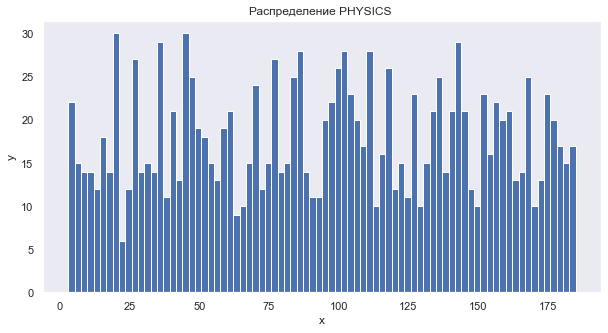

In [33]:
plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение PHYSICS ') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.grid() # сетка
#отрисовываем гистограмму
plt.hist(df['PHYSICS'], bins=50) 

plt.show()

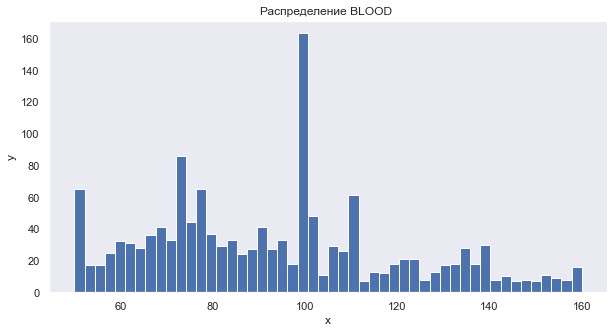

In [34]:
plt.figure(figsize=(10, 5)) # размерность
plt.title('Распределение BLOOD ') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.grid() # сетка
#отрисовываем гистограмму
plt.hist(df['BLOOD'], bins=50) 

plt.show()

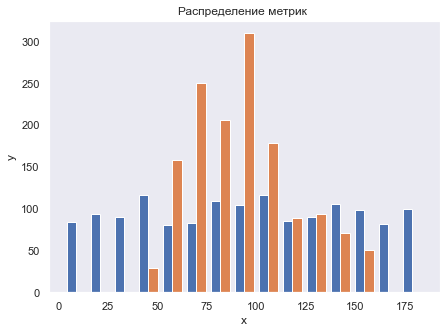

In [55]:
plt.figure(figsize=(7, 5)) # размерность
plt.title('Распределение метрик ') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.grid() # сетка
#отрисовываем гистограмму
plt.hist(df, bins=15) 

plt.show()

In [ ]:
Мы видим, что распределние PHYSICS достаточно равномерное, а распределение BLOOD имеет пик в районе 100.

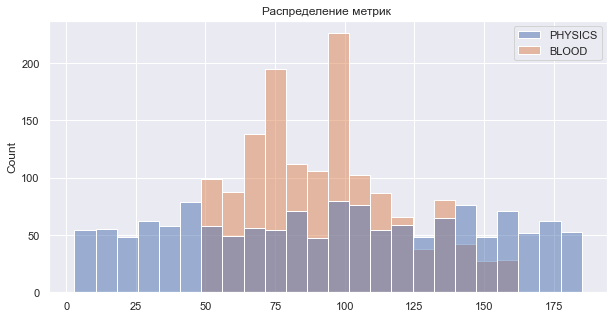

In [58]:
plt.figure(figsize=(10, 5))
plt.title('Распределение метрик ')
sns.histplot(df)

plt.show()

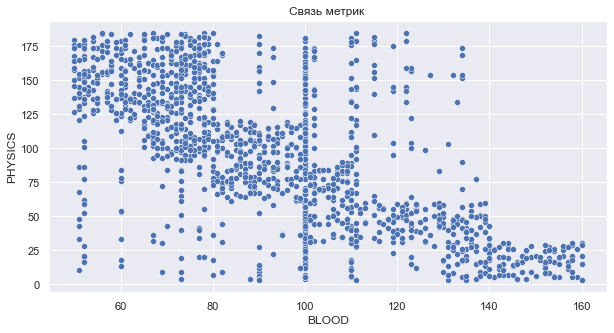

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Связь метрик ')
sns.scatterplot(x = df['BLOOD'], y = df['PHYSICS'])

plt.show()

In [ ]:
График показывает , что связь метрик присутствует , это видно по скоплениям точек 

In [91]:
def proxi_ranges (r1, r2, alpha = 0.05):
    cov = np.cov (r1, r2)
    print('Ковариация {:.2f}'.format(cov[0][1]))
    print('Дисперсия для индекса 1 - {:.2f}'.format(cov[0][0]))
    print('Дисперсия для индекса 2 - {:.2f}'.format(cov[1][1]))
    
    pearson_v, pearson_p = st.pearsonr(r1,r2)
    spearman_v, spearman_p = st.spearmanr(r1,r2)
    
    if pearson_p < alpha:
        if abs(pearson_v) < 0.3:
            pearson_result = 'слабая'
        elif abs(pearson_v) < 0.7:
            pearson_result = 'средняя'
        else:
            pearson_result = 'сильная'
        print(f'Корреляция Пирсона {pearson_result}')
    else:
        print('Корреляция Пирсона равна нулю')
    
    print(pearson_v)
    
    
    if spearman_p < alpha:
        if abs(spearman_v) < 0.3:
            spearman_result = 'слабая'
        elif abs(spearman_v) < 0.7:
            spearman_result = 'средняя'
        else:
            spearman_result = 'сильная'
        print(f'Корреляция Спирмана {spearman_result}')
    else:
        print('Корреляция Спирмана равна нулю')

In [92]:
proxi_ranges(df['BLOOD'], df['PHYSICS'])

Ковариация -921.47
Дисперсия для индекса 1 - 726.64
Дисперсия для индекса 2 - 2669.46
Корреляция Пирсона средняя
-0.6616215720573642
Корреляция Спирмана средняя


In [93]:
df_2 = pd.read_csv('Данные для дз5 Манн-Уитни.csv',  sep=';')

In [94]:
df_2

,BLOOD1,BLOOD2
0,66,140.0
1,92,140.0
2,75,78.0
3,98,79.0
4,84,80.0
...,...,...
684,81,NaN
685,121,NaN
686,98,NaN
687,96,NaN


In [98]:
df_2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BLOOD1  605 non-null    int64  
 1   BLOOD2  605 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.2 KB


In [97]:
df_2 = df_2.dropna() # избавились от пустых значений

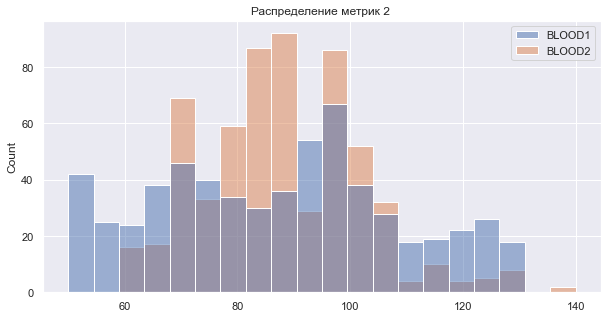

In [99]:
plt.figure(figsize=(10, 5))
plt.title('Распределение метрик 2 ')
sns.histplot(df_2)

plt.show()

In [101]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    s, p_value = st.mannwhitneyu(r1, r2)
    
    if p_value < alpha:
        print('Распределения НЕ равны')
    else:
        print('Распределения  равны')
        
    return s, p_value
        

In [102]:
mann_whitney_func(df_2['BLOOD1'], df_2['BLOOD2'] )

Распределения  равны


(178857.0, 0.49411579709672515)

In [103]:
def ttest_func(r1, r2, alpha = 0.05):
    s, p_value = st.ttest_ind(r1, r2)
    
    if p_value < alpha:
        print('Распределения НЕ равны')
    else:
        print('Распределения  равны')
        
    return s, p_value

In [104]:
ttest_func(df_2['BLOOD1'], df_2['BLOOD2'] )

Распределения  равны


(-0.6398988386814893, 0.5223597081606046)

In [ ]:
По результатат тестов наши распределения равны. Тесты проводились на очищенных данных , без нулевых значений.